In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load dataset (Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Split data into training and testing sets
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# Define the parameter grid to search through
param_grid = {
    'n_neighbors': [1,3,5,7,9]
}

# Instantiate the k-NN classifier
knn = KNeighborsClassifier()


# Instantiate the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy score: {:.2f}".format(grid_search.best_score_))


# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: {:.2f}".format(test_accuracy))

# Print cross-validation scores for all parameter combinations
print("\nCross-validation scores:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.2f} (+/- {:.2f}) for {}".format(mean, std * 2, params))

Best parameters found:  {'n_neighbors': 5}
Best cross-validation accuracy score: 0.97
Accuracy on test set: 1.00

Cross-validation scores:
0.94 (+/- 0.08) for {'n_neighbors': 1}
0.96 (+/- 0.05) for {'n_neighbors': 3}
0.97 (+/- 0.07) for {'n_neighbors': 5}
0.97 (+/- 0.04) for {'n_neighbors': 7}
0.96 (+/- 0.05) for {'n_neighbors': 9}


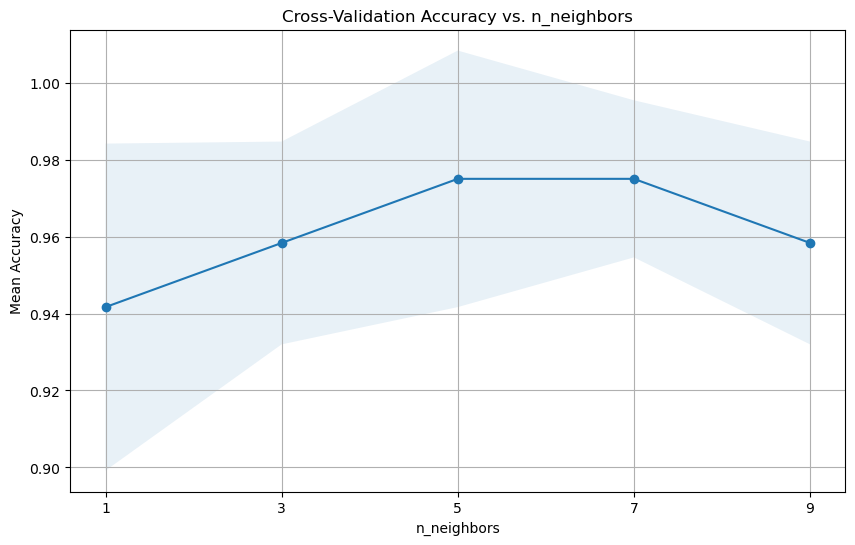

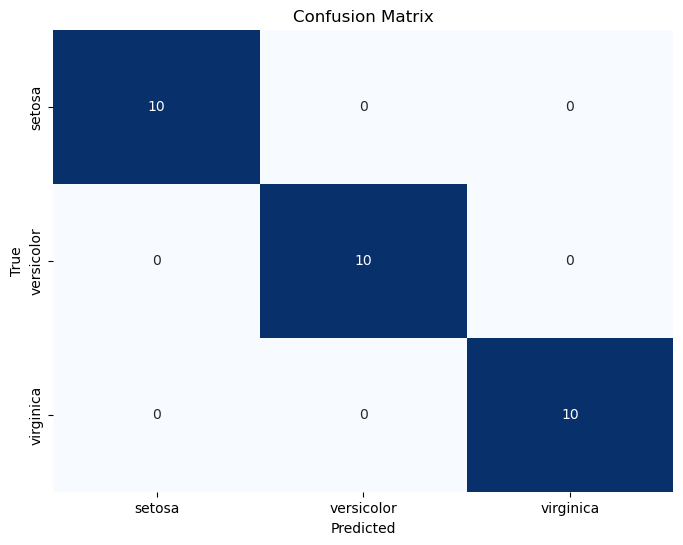

In [9]:
# Visualize cross-validation results
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], grid_search.cv_results_['mean_test_score'], marker='o')
plt.fill_between(param_grid['n_neighbors'], 
                 grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'], 
                 grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'], 
                 alpha=0.1)
plt.title('Cross-Validation Accuracy vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Accuracy')
plt.xticks(param_grid['n_neighbors'])
plt.grid(True)
plt.show()

# Optionally, plot the confusion matrix for the test set predictions
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()